In [2]:
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import operator

In [3]:
def generate_lst(r):
    """generate two list with length r, the 2nd list comes from randomly shuffling the first one"""
    l1 = list(range(r))
    l2 = l1.copy()
    shuffle(l2) # PGA: Investigate the properties of shuffle
    result = [l1,l2]
    return result

In [4]:
def count_fixed_pts(l1, l2):
    """count the number of fixed points in 2 lists"""
    count = 0
    for i in range(len(l1)):
        if l1[i]==l2[i]:
            count += 1
    return count

In [5]:
def generate_and_count(r):
    """input the length of list and run the previous 2 functions and output number of fixed pts"""
    two_lst = generate_lst(r)
    lst1 = two_lst[0]
    lst2 = two_lst[1]
    return count_fixed_pts(lst1,lst2)

In [6]:
def subfactorial(trial, length):
    """calculate number of subfactorial in n trials"""
    # PGA: I am not sure that this docstring is accurate.
    # I think that you want "calculates the number of fixed-point-free maps in n trials"
    # The "sub-factorial" is a particular function !n.
    # See Wikipedia: https://en.wikipedia.org/wiki/Derangement
    count = 0
    for i in range(trial):
        if generate_and_count(length) == 0:
            count += 1
    return count

In [7]:
def cal_prob(length):
    return subfactorial(100000, length)/100000
    # PGA: What does this function do?

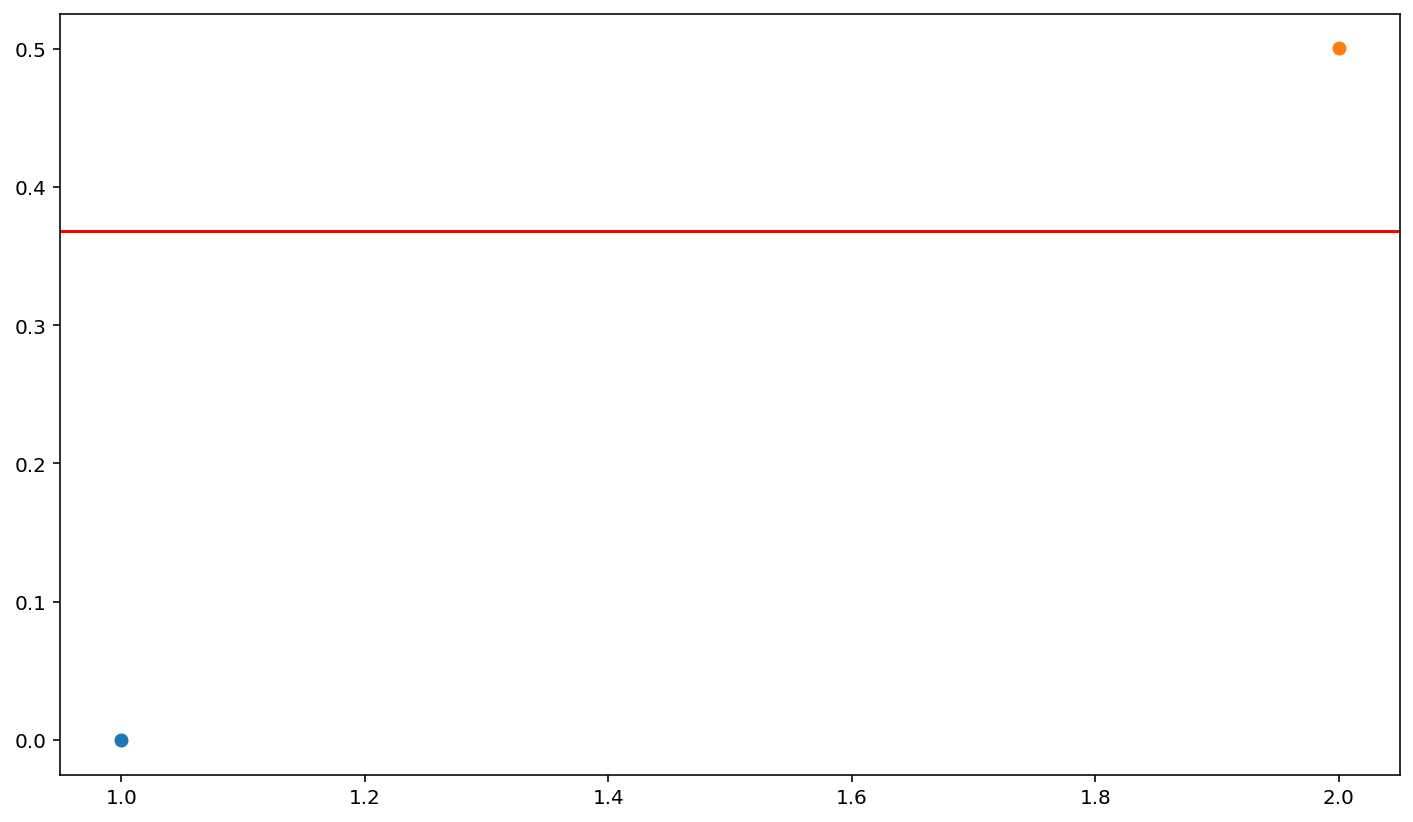

In [8]:
for l in range(1, 3):
    x = l
    y = cal_prob(l) 
    plt.scatter(x,y)
plt.axhline(y=1/math.exp(1), color='r', linestyle='-')
plt.show()
# PGA: This plot could benefit from having some axes labelled

In [9]:
# Below is the new content for the week of May 15th

In [10]:
def get_fixed_pts(ordered_set, random_comb):
    fixed_pts = []
    for i in range(len(ordered_set)):
        if ordered_set[i] == random_comb[i]:
            fixed_pts.append(ordered_set[i])
    return fixed_pts

In [11]:
def get_cycles(ordered_set, random_comb):
    """this function list out the cycles in a permutation"""
    """my logic:
            outer loop:
            inner loop:
                find what the current item goes to
                add that to the cycle
                set "current item" to that
                stop when you get to the first item
            add a list containing those items to the list of cycles
            start again with an item you haven't used yet
            keep going until the lists are empty (or only have one item)"""
    perm = [ordered_set, random_comb]
    cycle_list = []
    possible_beginnings= perm[0].copy()
    while True:
        if len(possible_beginnings)<2:
            break
        start = possible_beginnings[0]
        current = start
        new = perm[1][perm[0].index(start)]
        possible_beginnings.remove(start)
        if start == new:
            continue
        cycle = [start,new]
        current = new
        while True:
            possible_beginnings.remove(current)
            current = perm[1][perm[0].index(current)]
            if current == start:
                break
            cycle.append(current)
        cycle_list.append(cycle)
    return cycle_list + [get_fixed_pts(ordered_set, random_comb)]

In [12]:
get_cycles([1,2,3,4],[2,4,3,1])

[[1, 2, 4], [3]]

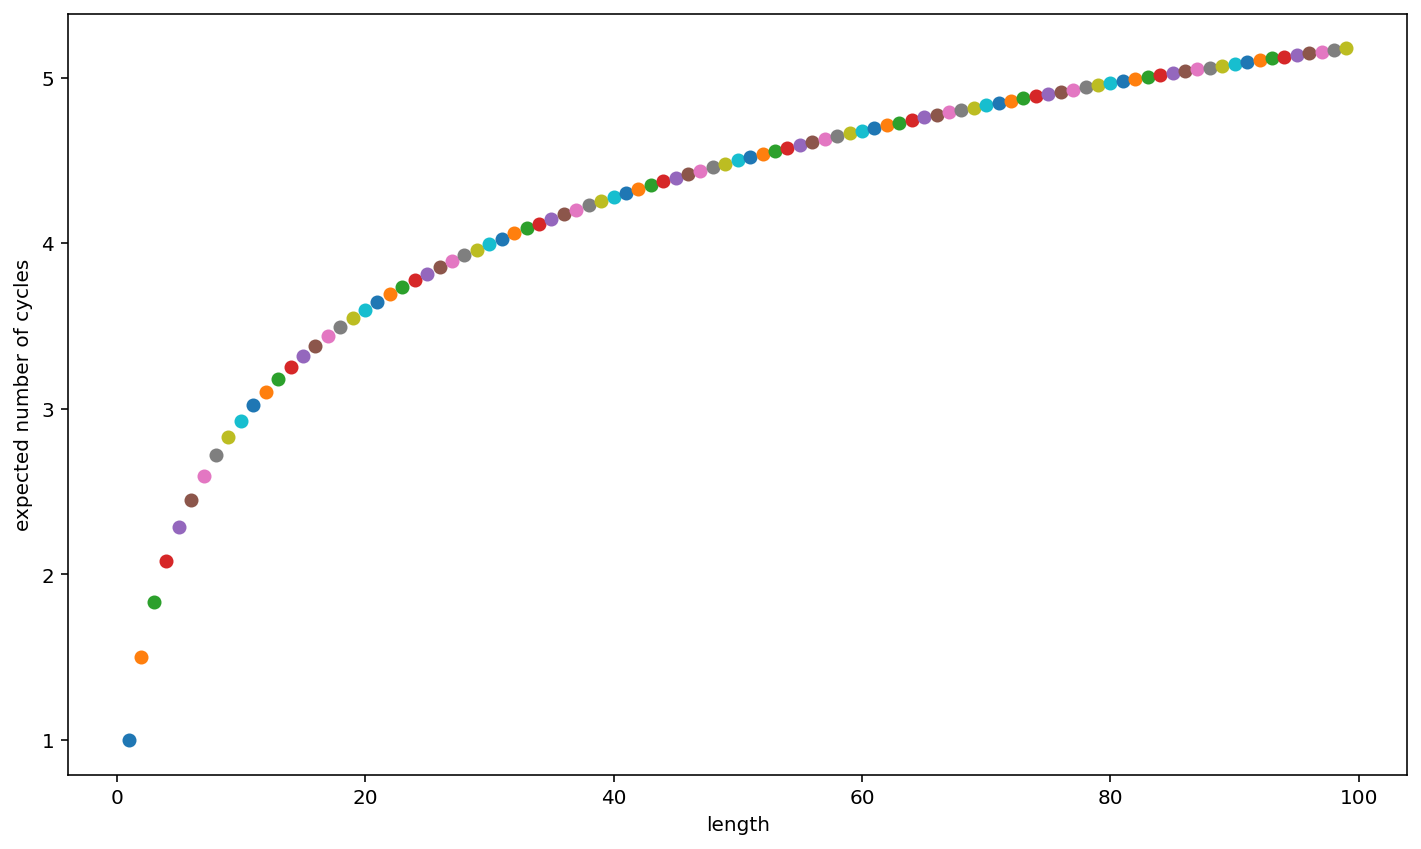

In [13]:
# Let us try verifying puzzle 5, the question being: What is the expected number of cycles in a random permutation of an n-element set?

"""Let's graph the hypothesis first, average number of cycles = 1+1/2+1/3+⋯+1/n"""
cycles = 0
for n in range(1,100):
    x = n
    cycles += 1/n
    plt.scatter(x,cycles)
plt.xlabel('length')
plt.ylabel('expected number of cycles')
plt.show()

In [14]:
# Now let's confirm this by graphing average number of cycles using our program
"""first of all, for each n, we need to run the function get_cycles many times with different permutations to get a good average"""
def average_number_cycle(n, sample):
    total_cycle = 0
    for i in range(sample):
        total_cycle += len(get_cycles(generate_lst(n)[0],generate_lst(n)[1]))
    return total_cycle/sample

In [15]:
"""for n in range(1,100):
    x = n
    average_cycles = average_number_cycle(n, 10000)
    plt.scatter(x,average_cycles)
plt.xlabel('length')
plt.ylabel('expected number of cycles')
plt.show()"""

"for n in range(1,100):\n    x = n\n    average_cycles = average_number_cycle(n, 10000)\n    plt.scatter(x,average_cycles)\nplt.xlabel('length')\nplt.ylabel('expected number of cycles')\nplt.show()"

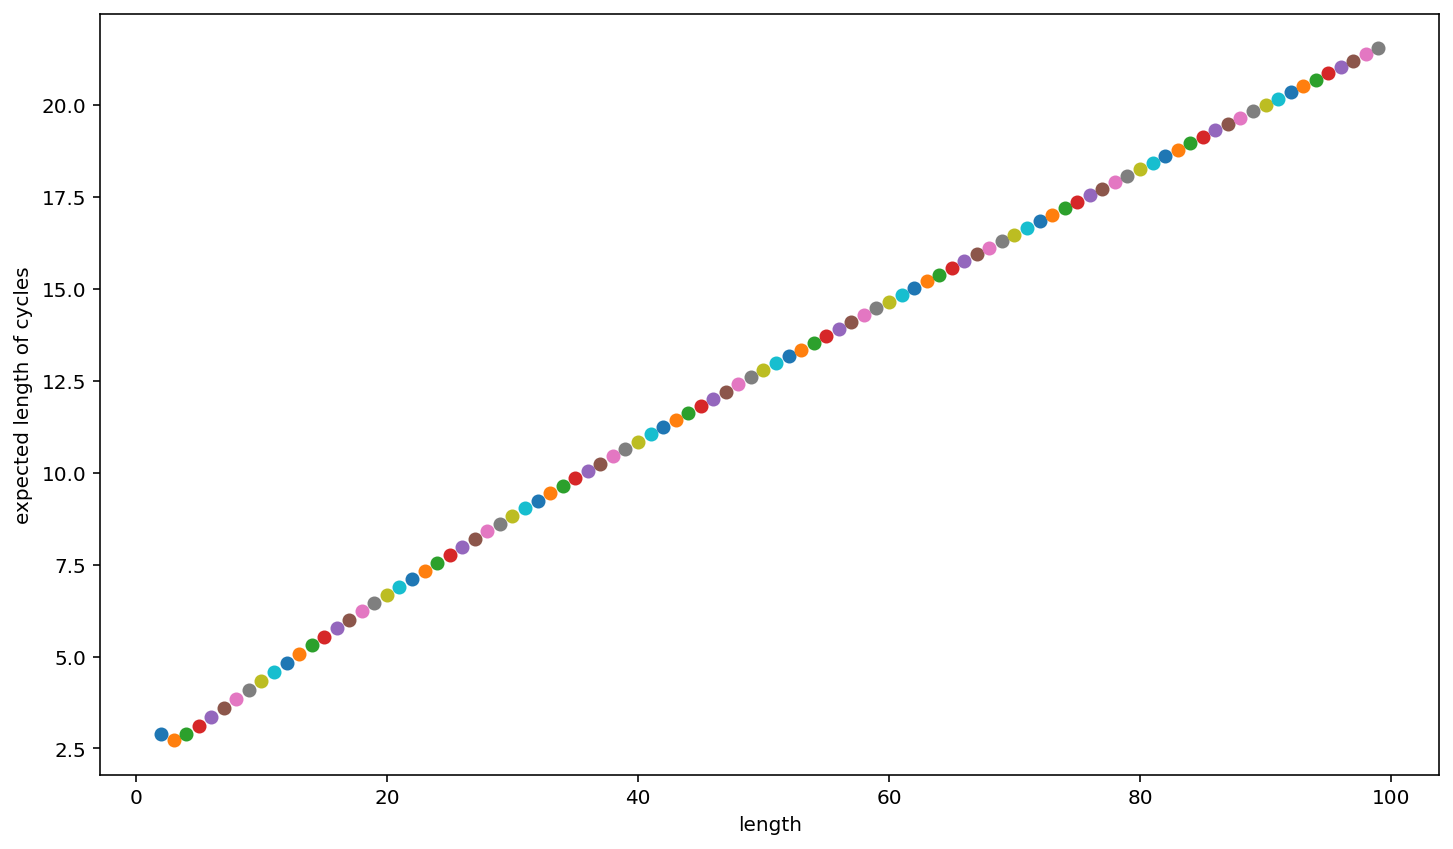

In [16]:
# Let us try verifying puzzle 6, the question being: What is the expected length of a cycle in a random permutation of an n-element set, asymptotically as n→∞?
"""Our hypothesis is the length would be n/ln(n), let us graph this function first"""
for n in range(2,100):
    x = n
    y = n/np.log(n)
    plt.scatter(x,y)
plt.xlabel('length')
plt.ylabel('expected length of cycles')
plt.show()

In [17]:
def length_of_cycle(ordered_set, random_comb):
    cycles = get_cycles(ordered_set, random_comb)
    return len(max(cycles,key=len))

In [18]:
def average_length_of_cycle(n, sample):
    total_length = 0
    for i in range(sample):
        total_length += length_of_cycle(generate_lst(n)[0],generate_lst(n)[1])
    return total_length/sample

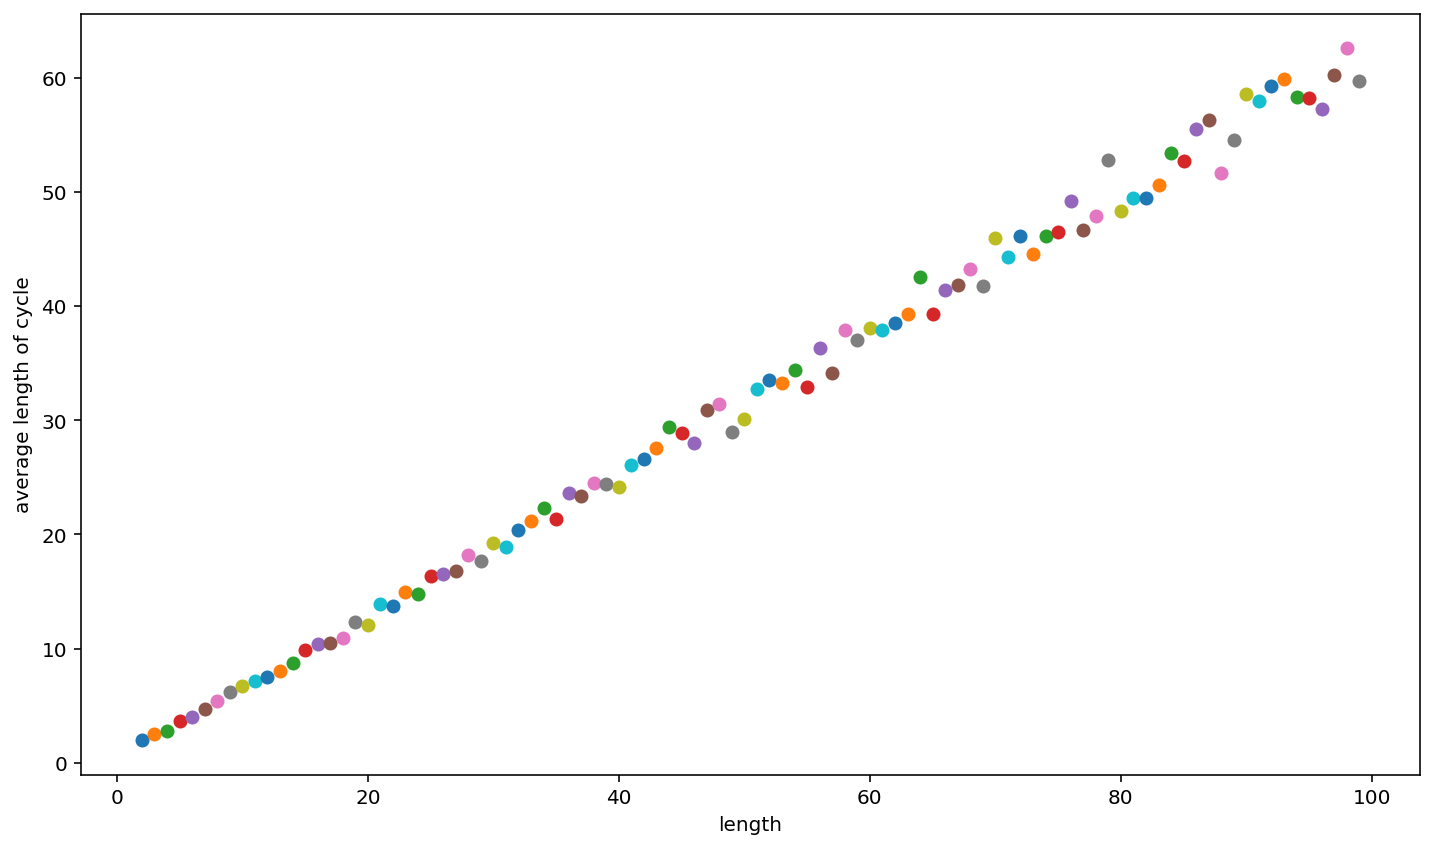

In [19]:
# Now we are ready to graph this!
for n in range(2,100):
    x = n
    average_length = average_length_of_cycle(n, 100)
    plt.scatter(x,average_length)
plt.xlabel('length')
plt.ylabel('average length of cycle')
plt.show()

In [20]:
# Puzzle 7: What is the expected number of cycles of length k in a random permutation of an n-element set?
"""Hypothesis: The answer is apparently 1/k when 1≤k≤n"""
# This is essenially a graph between k and expected number of cycles.
"""for k in range(2,100):
    x = k
    y = 1/k
    plt.scatter(x,y)
plt.xlabel('k')
plt.ylabel('numbers of cycles with length k')
plt.show()"""

"for k in range(2,100):\n    x = k\n    y = 1/k\n    plt.scatter(x,y)\nplt.xlabel('k')\nplt.ylabel('numbers of cycles with length k')\nplt.show()"

In [21]:
def count_kcycle(ordered_set, random_comb, k):
    """input permutation, output the number of cycles with length k"""
    cycle = get_cycles(ordered_set, random_comb)
    count = 0
    for cycles in cycle:
        if len(cycles) == k:
            count += 1
    return count

In [22]:
def get_average(n, k, sample):
    """repeat count_kcycle many times to obtain an average for n-dimensional permutation, n>=k"""
    count = 0
    for i in range(sample):
        count += count_kcycle(generate_lst(n)[0], generate_lst(n)[1], k)
    return count/sample

In [23]:
"""for k in range(0,100):
    x = k
    k_length_cycle = get_average(100, k, 5000)
    plt.scatter(x,k_length_cycle)
plt.xlabel('k')
plt.ylabel('cycle with length k')
plt.show()"""

"for k in range(0,100):\n    x = k\n    k_length_cycle = get_average(100, k, 5000)\n    plt.scatter(x,k_length_cycle)\nplt.xlabel('k')\nplt.ylabel('cycle with length k')\nplt.show()"

In [24]:
### Puzzle 6: What’s the expected length of a cycle in a random permutation of an n-element set? (Same with median and mode.)
### Step 1: Generate a Random Permutation with length n
### Step 2: Compute number of cycles for each cycle length
### Step 3: Run Step 1 and 2 many times and take the average
### Step 4: Graph with number of cycles as vertical axis and cycle length as horizontal axis
### Step 5: Compute average length, median length, mode

In [25]:
### Step 1: Let's generate a random permutation with length n:
n = 10
perm = generate_lst(n)

In [26]:
### Step 2: Compute number of cycles for each cycle length and put them in a dictionary {length: number of cycle}
"""input: output """
def num_of_cycles(perm):
    cycle = get_cycles(perm[0], perm[1])
    cleaned_lst = [x for x in cycle if x != []]
    output = {}
    for num in range(len(perm[0])+1):
        output[num] = 0 #build a dictionary with index to be the possible length, but the sublist should be 0 meaning we haven't started the count yet
    for sublist in cleaned_lst: #deal with each individual cycle
        output[len(sublist)] += 1
    return output

In [27]:
num_of_cycles(perm)  ###just to check that it works

{0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}

In [28]:
get_cycles(perm[0], perm[1])  ###just to check that it works

[[0, 5, 2], [3, 8], [4, 7, 9, 6], [1]]

In [29]:
### Step 3 and 4: Run the function many times and generate the graph
def generate_graph(dim, trial):
    total_cycle = {}
    for num in range(1,dim+1):
        total_cycle[num] = 0
    for k in range(trial):
        perm = generate_lst(dim)
        cycle_lst = num_of_cycles(perm)
        del cycle_lst[0]
        for key in cycle_lst:
            total_cycle[key] += cycle_lst[key]   ### count the total number of cycles with certain length (key) by incrementing the dictionary
    plt.bar(*zip(*sorted(total_cycle.items())))
    plt.plot(*zip(*sorted(total_cycle.items())), color='green')
    #plt.xticks(y_pos, objects)
    plt.xlabel('length of cycles')
    plt.ylabel('Number of Cycles')
    plt.title('number of cycles vs. length of cycles')
    plt.show()
    print ("average = " + str(average(total_cycle)))
    print ("median = " + str(median(total_cycle)))
    print ("mode = " + str(mode(total_cycle)))

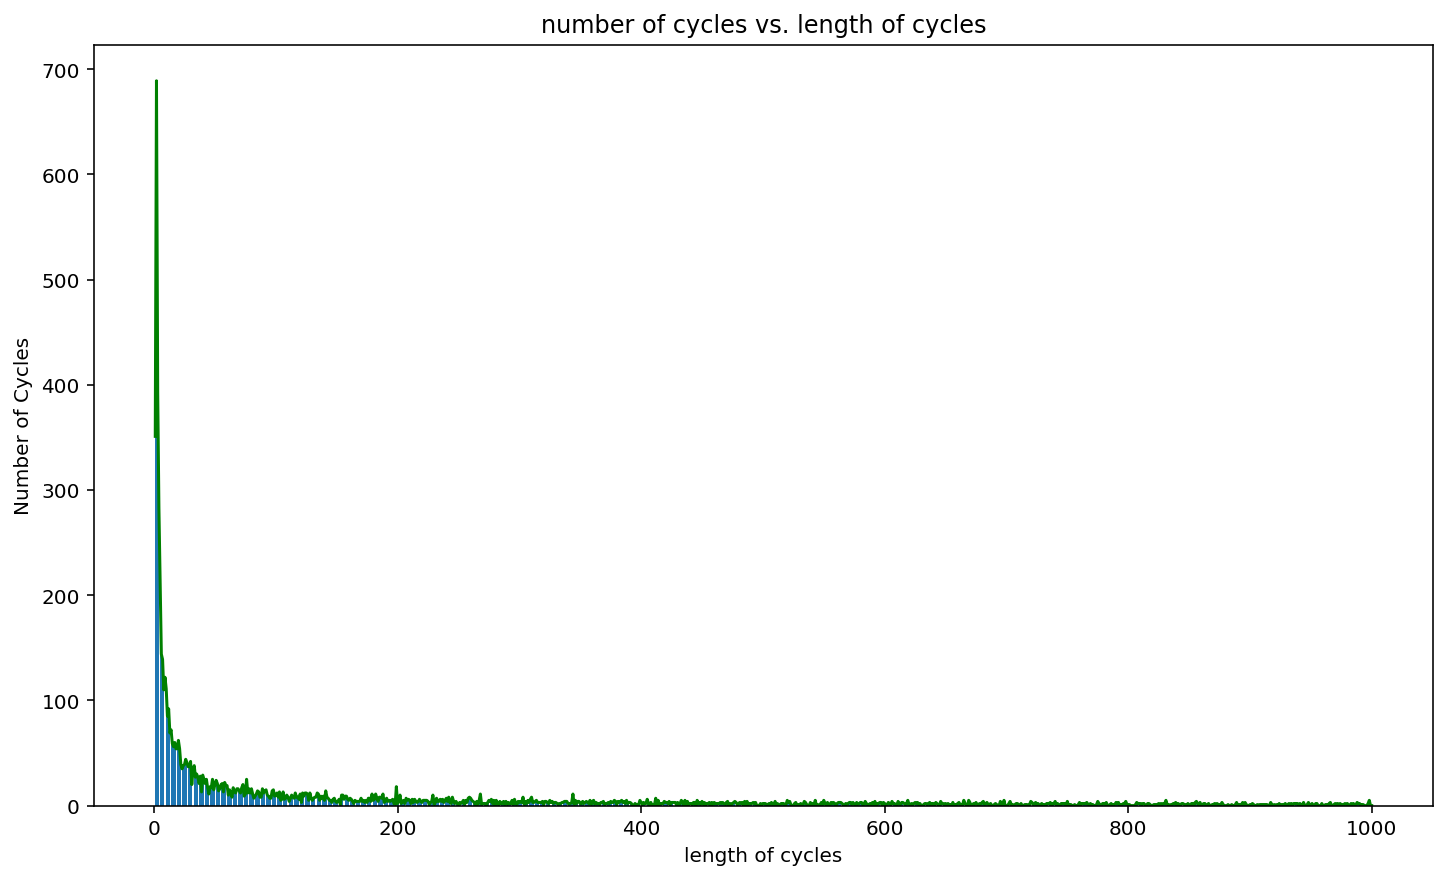

NameError: name 'average' is not defined

In [30]:
generate_graph(1000,1000)

In [0]:
### Now using the result that we have obtained, let us compute the average, median, and mode

In [31]:
def average(cycle_lst):
    total_num_of_cycles = sum(cycle_lst.values())
    total_length_of_cycles = 0
    for key in cycle_lst:
        total_length_of_cycles += key * cycle_lst[key]
    if total_num_of_cycles != 0:
        return total_length_of_cycles/total_num_of_cycles

In [32]:
def median(cycle_lst):
    lst = []
    for key in cycle_lst:
        lst.extend([key for i in range(cycle_lst[key])])
    return statistics.median(lst)

In [33]:
def mode(cycle_lst):
    return max(cycle_lst.items(), key=operator.itemgetter(1))[0]

In [34]:
### Now let us constructing other graphs that directly related to puzzle 6. Let x axis be the dimension of a set n, and y axis be the average/median/mode length

In [35]:
def average_graph(dim, trial):
    total_cycle = {}
    for num in range(1,dim+1):
        total_cycle[num] = 0
    for k in range(trial):
        perm = generate_lst(dim)
        cycle_lst = num_of_cycles(perm)
        del cycle_lst[0]
        for key in cycle_lst:
            total_cycle[key] += cycle_lst[key]   ### count the total number of cycles with certain length (key) by incrementing the dictionary
    return average(total_cycle)

In [36]:
def median_graph(dim, trial):
    total_cycle = {}
    for num in range(1,dim+1):
        total_cycle[num] = 0
    for k in range(trial):
        perm = generate_lst(dim)
        cycle_lst = num_of_cycles(perm)
        del cycle_lst[0]
        for key in cycle_lst:
            total_cycle[key] += cycle_lst[key]   ### count the total number of cycles with certain length (key) by incrementing the dictionary
    return median(total_cycle)

In [0]:
median({1: 4, 2: 3, 3: 2, 4: 4, 5: 1, 6: 2, 7: 2, 8: 1, 9: 1, 10: 2})

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log


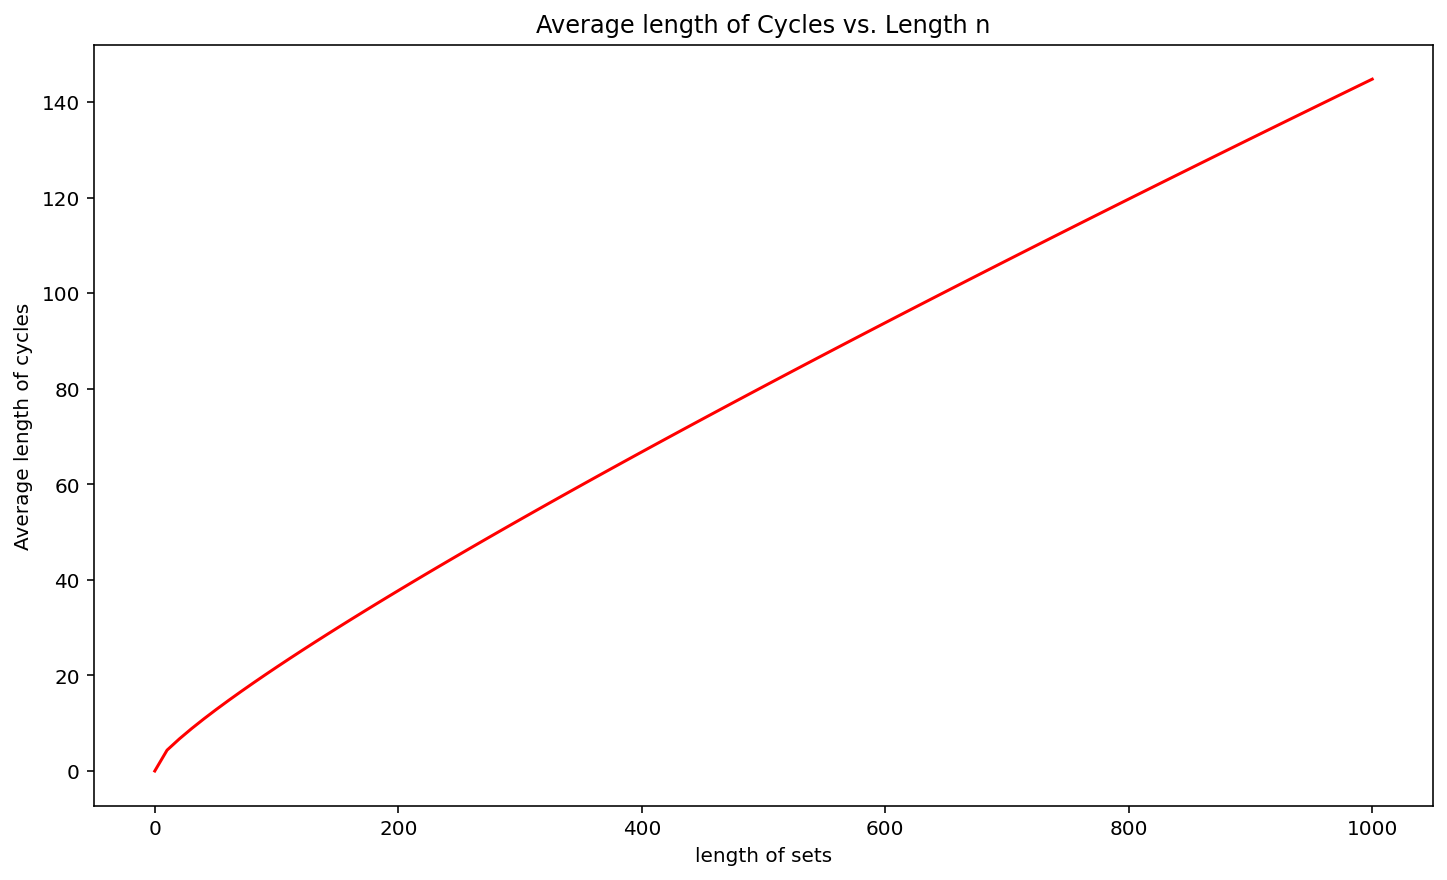

In [37]:
for n in range(10):
    if n%10==0:
        y_value = average_graph(n, 1000)
        plt.scatter(n, y_value)
x = np.linspace(0,1000,100)
y=x/np.log(x)
plt.plot(x,y,'r')
plt.xlabel('length of sets')
plt.ylabel('Average length of cycles')
plt.title('Average length of Cycles vs. Length n')
plt.show()

In [38]:
for n in range(200, 300):
    if True: #n%10==0:
        y_value = median_graph(n, 10000)
        plt.scatter(n, y_value)
plt.show()